*****************************************************************************
4.705850252990422 4.705850252990418 4.732436977583594
2.496973733411163 2.496973733411168 2.5110809296451237
*****************************************************************************


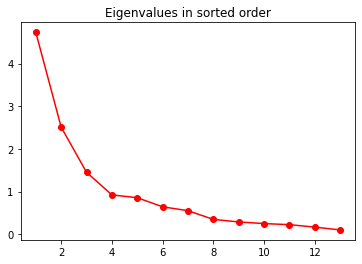

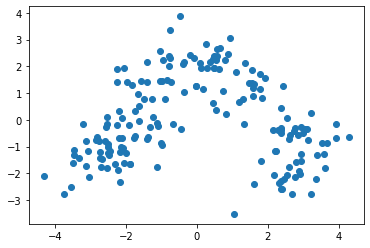

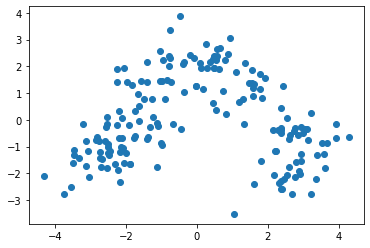

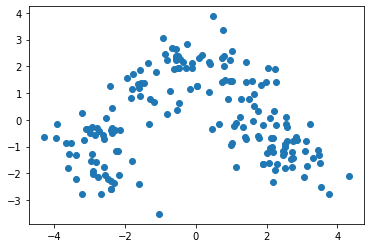

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("wine.data", header = None)

# Getting rid of the labels.
X = df.loc[:, df.columns[1:]].values

# Standardizing the features. 
X = StandardScaler().fit_transform(X)

# Covariance matrix
cov_mat = np.cov(X.T)

# Obtain eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)

# Sort eigenvalues and eigenvectors in order of decreasing eigenvalue
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

# Plot eigenvalues in decreasing order
plt.figure(0)
plt.plot(np.arange(1,14), eigenvals, 'ro-')
plt.title('Eigenvalues in sorted order')

# 1. Manually find the projection 
new = np.matmul(eigenvecs.T, X.T)
plt.figure(1)
plt.scatter(new[0,:],new[1,:])

# 2. Using the built-in functions 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_joined = pd.concat([df_pca, df[0]], axis = 1)
df_joined.rename(columns = {'principal component 1':'principal component 1', \
                            'principal component 2':'principal component 2', 0: 'label'}, inplace = True)

plt.figure(2)
plt.scatter(-principalComponents[:,0], principalComponents[:,1])
plt.figure(3)
plt.scatter(principalComponents[:,0], principalComponents[:,1])
#sns.lmplot('principal component 1', 'principal component 2',\
#           data=df_joined, fit_reg=False, hue='label', markers=['1','2','3'])

# Check if the two results are identical (manual, built-in)
print('*'*77)
print(np.std(new[0,:])**2, np.std(principalComponents[:,0])**2, eigenvals[0])
print(np.std(new[1,:])**2, np.std(principalComponents[:,1])**2, eigenvals[1])
print('*'*77)